# Исследование жилой недвижимости г. Саратова

## Анализ предложений по продаже квартир

### План действий:

1. + Загрузить датасет
2. + Проверить типы данных столбцов на соответствие данным
3. Посмотреть интенсивность добавления объявлений
3. Посмотреть структуру предложения по типам квартир и районам
4. Посмотреть зависимость стоимость квадратного метра от площади
5. Посмотреть зависимость стоимости квадратного метра от этажа для домов различной этажности

In [24]:
import matplotlib
import seaborn
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline 

### Загружаем датасет

In [2]:
data_flats = pd.read_csv('data_flats.csv', sep=';')

In [3]:
data_flats.head()

,Тип,Адрес,Район,Площадь,Жилая,Кухня,Цена,Торг,Планировка квартиры,Комнаты,...,Лифт,Мусоропровод,Стадия строительства,Год,Застройщик,Ипотека,Продажа,Создано,Обновлено,url
0,3-х комнатная квартира,"в ЖК «Крылья», ул. Чернышевского, 137а, ОКТЯБР...",ОКТЯБРЬСКИЙ,87.6,44.29,11.37,5000000.0,NaN,NaN,комнаты изолированные,...,есть лифт в доме,NaN,дом сдан,2017,Союз-С,возможна продажа в ипотеку,чистая продажа,04-07-2018,07-07-2019,https://kvadrat64.ru/sellflat-499534.html
1,3-х комнатная квартира,"в ЖК «Крылья», ул. Чернышевского, 137а, ОКТЯБР...",ОКТЯБРЬСКИЙ,87.6,44.29,11.37,4250000.0,NaN,NaN,комнаты изолированные,...,есть лифт в доме,NaN,дом сдан,2017,Союз-С,возможна продажа в ипотеку,чистая продажа,04-07-2018,07-07-2019,https://kvadrat64.ru/sellflat-499537.html
2,4-х комнатная квартира,"в ЖК «Крылья», ул. Им Н. Г. Чернышевского, 137...",ОКТЯБРЬСКИЙ,112.3,57.60,10.36,4860000.0,NaN,NaN,комнаты изолированные,...,есть лифт в доме,NaN,дом сдан,2017,Союз-С,возможна продажа в ипотеку,чистая продажа,07-06-2018,07-07-2019,https://kvadrat64.ru/sellflat-495453.html
3,1 комнатная квартира,"ул. Железнодорожная, 17, ФРУНЗЕНСКИЙ, Саратов",ФРУНЗЕНСКИЙ,45.0,23.00,9.00,2100000.0,разумный торг,NaN,NaN,...,NaN,NaN,NaN,2001,NaN,возможна продажа в ипотеку,чистая продажа,30-06-2019,07-07-2019,https://kvadrat64.ru/sellflat-548321.html
4,1 комнатная квартира,"ул. Большая Садовая,, 160/80, КИРОВСКИЙ, Сарат...",КИРОВСКИЙ,33.0,18.00,2.55,1550000.0,разумный торг,старого типа,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,15-05-2019,07-07-2019,https://kvadrat64.ru/sellflat-543709.html


In [4]:
data_flats.shape

(10745, 27)

### Проверяем данные и приводим типы

In [5]:
data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10745 entries, 0 to 10744
Data columns (total 27 columns):
Тип                     10745 non-null object
Адрес                   10745 non-null object
Район                   10535 non-null object
Площадь                 10745 non-null float64
Жилая                   10745 non-null float64
Кухня                   10745 non-null float64
Цена                    10745 non-null float64
Торг                    3632 non-null object
Планировка квартиры     2396 non-null object
Комнаты                 4618 non-null object
Санузел                 7481 non-null object
Высота потолков         10745 non-null float64
Окна                    4464 non-null object
Балкон                  6971 non-null object
Дом(cтроение)           9752 non-null object
Этаж                    10745 non-null int64
Этажей в доме           10745 non-null int64
Лифт                    5069 non-null object
Мусоропровод            1416 non-null object
Стадия строительства   

In [6]:
data_flats = data_flats[(data_flats['Площадь'] != 0)]

In [7]:
data_flats['Создано'] = pd.to_datetime(data_flats['Создано'], format="%d-%m-%Y")
data_flats['Обновлено'] = pd.to_datetime(data_flats['Обновлено'], format="%d-%m-%Y")

### Площадь представленных к продаже квартир

In [8]:
data_flats['Площадь'].describe()

count    10744.000000
mean        53.145951
std         23.598883
min          6.000000
25%         38.000000
50%         48.000000
75%         63.000000
max       1000.000000
Name: Площадь, dtype: float64

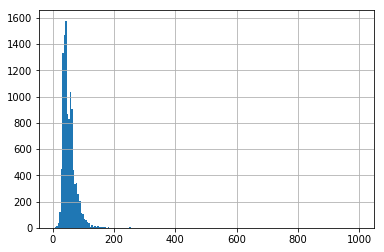

In [21]:
data_flats['Площадь'].hist(bins=200)

In [9]:
data_flats['Цена за метр'] = data_flats['Цена']/data_flats['Площадь']

In [18]:
data_flats[['Площадь', 'Цена', 'Цена за метр']].head()

,Площадь,Цена,Цена за метр
0,87.6,5000000.0,57077.625571
1,87.6,4250000.0,48515.981735
2,112.3,4860000.0,43276.936776
3,45.0,2100000.0,46666.666667
4,33.0,1550000.0,46969.696970


In [22]:
data_flats['Цена за метр'].describe()

count     10744.000000
mean      41330.200978
std       14019.603342
min          24.813896
25%       32357.754974
50%       39411.764706
75%       47345.268330
max      376470.588235
Name: Цена за метр, dtype: float64

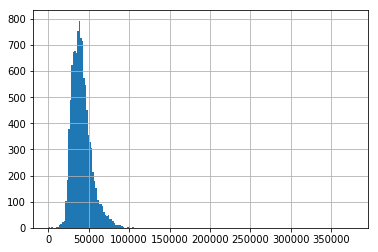

In [19]:
data_flats['Цена за метр'].hist(bins=200)

### Интенсивность добавления объявлений во времени

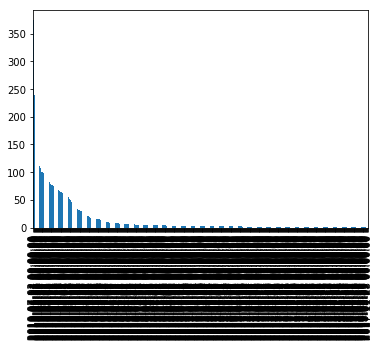

In [29]:
data_flats['Создано'].value_counts().plot(kind='bar')

### Структура предложения по типам квартир и районам

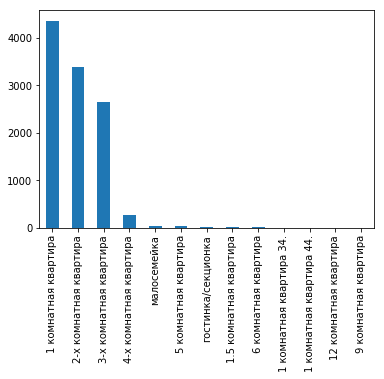

In [28]:
data_flats['Тип'].value_counts().plot(kind='bar')

### Зависимость стоимость квадратного метра от площади

### Зависимость стоимости квадратного метра от этажа для домов различной этажности